# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [248]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [249]:
import pandas as pd
df_archive = pd.read_csv('C:/Users/Hussam-AlZahrani/Downloads/twitter-archive-enhanced.csv')

df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [250]:
#Download the file using the Request library via the provided URL 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [251]:
#to Download
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [252]:
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')

df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [253]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py'
response = requests.get(url)
response

<Response [200]>

In [254]:
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [255]:
response = requests.get('https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json')
with open('tweet_json.txt', mode = 'wb') as file:
  file.write(response.content)

f = 'tweet_json.txt'
records = [json.loads(line) for line in open(f)]
records[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [256]:
select_a = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        
        
        select_a.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})

tw_json = pd.DataFrame(select_a, columns=['tweet_id','favorites','retweets'])

In [257]:
tw_json.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Archive Table

In [258]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [259]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [260]:
df_archive.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [261]:
df_archive.duplicated().sum()

0

In [262]:
df_archive.tweet_id.duplicated().sum()

0

In [263]:
df_archive.doggo.value_counts()


None     2259
doggo    97  
Name: doggo, dtype: int64

In [264]:
df_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [265]:
df_archive['name'].value_counts().head(20)

None       745
a          55 
Charlie    12 
Cooper     11 
Lucy       11 
Oliver     11 
Tucker     10 
Penny      10 
Lola       10 
Winston    9  
Bo         9  
Sadie      8  
the        8  
Daisy      7  
Buddy      7  
Toby       7  
an         7  
Bailey     7  
Leo        6  
Oscar      6  
Name: name, dtype: int64

In [266]:
df_archive.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

## image predictions table

In [267]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [268]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [269]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [270]:
df_image.p1.value_counts()


golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
pillow                1  
carousel              1  
bald_eagle            1  
lorikeet              1  
orange                1  
Name: p1, Length: 378, dtype: int64

In [271]:
df_image.p2.value_counts()


Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
                      .. 
medicine_chest        1  
quail                 1  
horse_cart            1  
waffle_iron           1  
bagel                 1  
Name: p2, Length: 405, dtype: int64

In [272]:
df_image.p3.value_counts()


Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                    1 
assault_rifle         1 
axolotl               1 
pot                   1 
banana                1 
Name: p3, Length: 408, dtype: int64

In [273]:
df_image.tweet_id.duplicated().sum()


0

In [274]:
df_image.jpg_url.duplicated().sum()

66

## tweet json table

In [275]:
tw_json

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [276]:
tw_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [277]:
tw_json.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [278]:
tw_json.duplicated().sum()

0

### Quality issues
1.remove retweets and replies

2.change datatype of timestamp

3.remove columns that not important

4.There are more sources but it not important

5.some rating_numerator are not correct 

6.change data type for tweet_id

7.p1,p2 and p3 some of the start with lowercase others with uppercase

8.There are some photos are missing for IDs


### Tidiness issues
1.all dataframe are related we shoud marge them

2.There are 4 columns for dog stages: puppo, pupper, floofer, doggo

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [279]:
# Make copies of original pieces of data
df_archi_cleans = df_archive.copy()
df_image_cleans = df_image.copy()
tw_json_cleans = tw_json.copy()

### Tidiness issue #1: all dataframe are related we shoud marge them

Define: I will mare all dataframe into 1 , joining on tweet_id 

In [280]:
#marge df_archi_cleans data whith df_image_cleans
df_archi_cleans =pd.merge(df_archi_cleans,df_image_cleans, on='tweet_id',how = 'left')
#marge df_archi_cleans data with tw_json_cleans data
df_archi_cleans = pd.merge(df_archi_cleans,tw_json_cleans, on='tweet_id',how = 'left')


#### Test

In [281]:
df_archi_cleans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Tidiness issue 2: There are 4 columns for dog stages: puppo, pupper, floofer, doggo



#### Define:I will marge them in one columns

#### Code

In [282]:
# marge all 4 columns
df_archi_cleans['stage_of_dogs'] =df_archi_cleans['text'].str.extract('(puppo|pupper|doggo|floofer)')

df_archi_cleans

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage_of_dogs
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111.0,41.0,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,311.0,147.0,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,...,True,malinois,0.138584,True,bloodhound,0.116197,True,128.0,47.0,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twit

#### Test

In [283]:
df_archi_cleans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [284]:
#Delete puppo|pupper|doggo|floofer colums

df_archi_cleans= df_archi_cleans.drop(columns=['puppo','pupper','doggo','floofer'])


In [285]:
df_archi_cleans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  jpg_url                     2075 

### Issue #1: Quality Issues : remove retweets and replies 

#### Define :I will remove retweets and replies from data



#### Code

In [286]:
#select Replies and retweets that are not null
Retweets = df_archi_cleans.loc[df_archi_cleans['retweeted_status_id'].notnull()]
Replies = df_archi_cleans.loc[df_archi_cleans['in_reply_to_status_id'].notnull()]

#drop those lines
df_archi_cleans = df_archi_cleans.drop(Retweets.index, axis=0)
df_archi_cleans = df_archi_cleans.drop(Replies.index, axis=0)

In [287]:
df_archi_cleans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  jpg_url                     1971 

#### Test

In [288]:
df_archi_cleans.stage_of_dogs.value_counts()

pupper     240
doggo      80 
puppo      29 
floofer    4  
Name: stage_of_dogs, dtype: int64

### Issue #2: Quality Issues: change datatype of timestamp


Define

change datatype of timestamp from object to datetime

In [289]:
# Convert to datetime


df_archi_cleans.timestamp = pd.to_datetime(df_archi_cleans.timestamp)

##### Test

In [290]:
df_archi_cleans.timestamp.head(5)


0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [291]:
df_archi_cleans

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage_of_dogs
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111.0,41.0,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,311.0,147.0,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,...,True,malinois,0.138584,True,bloodhound,0.116197,True,128.0,47.0,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twit

### Issue 3: Quality Issues : we have some columns are not important 

Define

remove that columns retweeted_status_id ,retweeted_status_user_id , retweeted_status_timestamp,in_reply_to_status_id, in_reply_to_user_id

In [292]:
# remove columns

df_drop = ['in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'retweeted_status_id']





In [293]:
df_archi_cleans.drop(df_drop, axis = 1, inplace=True)


In [294]:
df_archi_cleans.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage_of_dogs
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,NaN


### Issue 4 : There are more sources but it not important

#### Define

replace url with name of category 

In [295]:
df_archi_cleans.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [296]:
df_archi_cleans.source = df_archi_cleans.source.replace({
                                                            '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck',
                                                            '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                            '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client','<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone'})


In [297]:
df_archi_cleans.source.value_counts()


Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

### Issue 5 Quality Issues :some rating_numerator are not correct .

#### Define
We should check the text to see the correct ratings and use value_counts to see abnormal values.


In [298]:

# new dataframe 
df_abnormal_rating = df_archi_cleans[['text', 'tweet_id', 'rating_denominator', 'rating_numerator']]

#Filter the rating
df_abnormal_denominator = df_abnormal_rating.loc[df_abnormal_rating['rating_denominator']!= 10]
# to see all text 
pd.set_option('display.max_colwidth', -1)                                                                
df_abnormal_denominator

C:\Users\Hussam-AlZahrani\AppData\Local\Temp\ipykernel_15108\19817087.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,text,tweet_id,rating_denominator,rating_numerator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,820690176645140481,70,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,810984652412424192,7,24
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,758467244762497024,150,165
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",740373189193256964,11,9
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,731156023742988288,170,204
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,722974582966214656,20,4
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,713900603437621249,90,99
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",709198395643068416,50,45


In [299]:
# 820690176645140481 - more than one dog
df_archi_cleans.loc[df_archi_cleans.tweet_id == 820690176645140481, 'rating_numerator'] = 12
df_archi_cleans.loc[df_archi_cleans.tweet_id == 820690176645140481, 'rating_denominator'] = 10

# 810984652412424192 - there is no rate
df_archi_cleans.loc[df_archi_cleans.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df_archi_cleans.loc[df_archi_cleans.tweet_id == 810984652412424192, 'rating_denominator'] = 10

# 758467244762497024 - more than one dog
df_archi_cleans.loc[df_archi_cleans.tweet_id == 758467244762497024, 'rating_numerator'] = 11
df_archi_cleans.loc[df_archi_cleans.tweet_id == 758467244762497024, 'rating_denominator'] = 10

# 740373189193256964
df_archi_cleans.loc[df_archi_cleans.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df_archi_cleans.loc[df_archi_cleans.tweet_id == 740373189193256964, 'rating_denominator'] = 10

# 731156023742988288 -more than one dog
df_archi_cleans.loc[df_archi_cleans.tweet_id == 731156023742988288, 'rating_numerator'] = 13
df_archi_cleans.loc[df_archi_cleans.tweet_id == 731156023742988288, 'rating_denominator'] = 10

# 722974582966214656 
df_archi_cleans.loc[df_archi_cleans.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df_archi_cleans.loc[df_archi_cleans.tweet_id == 722974582966214656, 'rating_denominator'] = 10

# 716439118184652801
df_archi_cleans.loc[df_archi_cleans.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df_archi_cleans.loc[df_archi_cleans.tweet_id == 716439118184652801, 'rating_denominator'] = 10

# 713900603437621249 - more than one dog 
df_archi_cleans.loc[df_archi_cleans.tweet_id == 713900603437621249, 'rating_numerator'] = 11
df_archi_cleans.loc[df_archi_cleans.tweet_id == 713900603437621249, 'rating_denominator'] = 10

# 10658690886586372 - more than one dog
df_archi_cleans.loc[df_archi_cleans.tweet_id == 710658690886586372, 'rating_numerator'] = 10
df_archi_cleans.loc[df_archi_cleans.tweet_id == 710658690886586372, 'rating_denominator'] = 10

# 709198395643068416 -more than one dog
df_archi_cleans.loc[df_archi_cleans.tweet_id == 709198395643068416, 'rating_numerator'] = 9
df_archi_cleans.loc[df_archi_cleans.tweet_id == 709198395643068416, 'rating_denominator'] = 10

# 704054845121142784 - more than one dog
df_archi_cleans.loc[df_archi_cleans.tweet_id == 704054845121142784, 'rating_numerator'] = 12
df_archi_cleans.loc[df_archi_cleans.tweet_id == 704054845121142784, 'rating_denominator'] = 10

# 697463031882764288 - more than one dog
df_archi_cleans.loc[df_archi_cleans.tweet_id == 697463031882764288, 'rating_numerator'] = 11
df_archi_cleans.loc[df_archi_cleans.tweet_id == 697463031882764288, 'rating_denominator'] = 10

# 684222868335505415 - more than one dog
df_archi_cleans.loc[df_archi_cleans.tweet_id == 684222868335505415, 'rating_numerator'] = 11
df_archi_cleans.loc[df_archi_cleans.tweet_id == 684222868335505415, 'rating_denominator'] = 10

# 682962037429899265 
df_archi_cleans.loc[df_archi_cleans.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df_archi_cleans.loc[df_archi_cleans.tweet_id == 682962037429899265, 'rating_denominator'] = 10

# 677716515794329600 - more than one dog
df_archi_cleans.loc[df_archi_cleans.tweet_id == 677716515794329600, 'rating_numerator'] = 12
df_archi_cleans.loc[df_archi_cleans.tweet_id == 677716515794329600, 'rating_denominator'] = 10

# 675853064436391936 -more than one dog
df_archi_cleans.loc[df_archi_cleans.tweet_id == 675853064436391936, 'rating_numerator'] = 11
df_archi_cleans.loc[df_archi_cleans.tweet_id == 675853064436391936, 'rating_denominator'] = 10

# 66287406224695296
df_archi_cleans.loc[df_archi_cleans.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df_archi_cleans.loc[df_archi_cleans.tweet_id == 666287406224695296, 'rating_denominator'] = 10

In [300]:
df_archi_cleans.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage_of_dogs


### Issue 6 : change data type for tweet_id

#### Define

change data type for tweet_id from intger to string

In [301]:
#change data type for tweet_id to string 

df_archi_cleans.tweet_id=df_archi_cleans.tweet_id.astype(str)

test

In [302]:
df_archi_cleans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   float64            
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

### Issue 7 : p1,p2 and p3 some of the start with lowercase others with uppercase

#### Define

change all lowercase to uppercase

In [303]:
#change all lowercase to uppercase

#for p1
df_archi_cleans.p1=df_archi_cleans.p1.str.title()
#for p2
df_archi_cleans.p2=df_archi_cleans.p2.str.title()
#for p3
df_archi_cleans.p3=df_archi_cleans.p3.str.title()

test

In [304]:
df_archi_cleans.p2.head(30)

0     Bagel              
1     Pekinese           
2     Malamute           
3     Labrador_Retriever 
4     English_Springer   
5     Irish_Terrier      
6     Border_Collie      
7     Eskimo_Dog         
8     Irish_Setter       
9     Cardigan           
10    Pomeranian         
11    Labrador_Retriever 
12    Cardigan           
13    Boxer              
14    Labrador_Retriever 
15    Borzoi             
16    Tibetan_Mastiff    
17    Labrador_Retriever 
18    Eskimo_Dog         
20    Pug                
21    Redbone            
22    Tow_Truck          
23    Rhodesian_Ridgeback
24    Sea_Lion           
25    Eskimo_Dog         
26    Toy_Terrier        
27    Great_Pyrenees     
28    Sports_Car         
29    Chihuahua          
31    Shower_Cap         
Name: p2, dtype: object

### Issue 8 : There are some photos are missing for IDs

#### Define

Remove all rows that photo are missing 

In [305]:
#Remove all rows that photo are missing

df_archi_cleans=df_archi_cleans[df_archi_cleans.jpg_url.notnull()]

test

In [306]:
df_archi_cleans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   float64            
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [307]:
df_archi_cleans.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### percentage of stage of dogs 

Text(0.5, 1.0, 'percentage of stage of dogs')

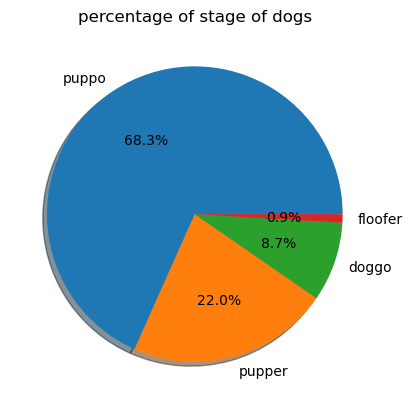

In [308]:
Stage_d=df_archi_cleans.stage_of_dogs.value_counts()

plt.pie(Stage_d, labels = ['puppo','pupper','doggo','floofer'],
        #to show percentage 
       autopct = '%1.1f%%',
       shadow = True
       )
plt.title('percentage of stage of dogs')

### Insights:
1.the lowest percentage is floofer 

2.the highest percentage is puppo


percentage of users 

Text(0.5, 1.0, 'User Client')

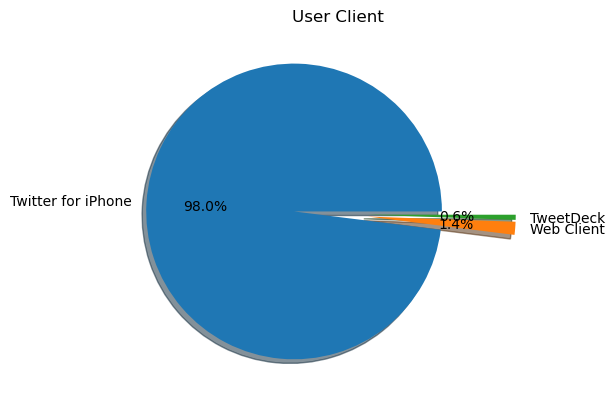

In [310]:
df_archi_cleans.source.value_counts()
df=df_archi_cleans.source.value_counts(normalize=True)

plt.pie(df,labels =['Twitter for iPhone', 'Web Client','TweetDeck'],
       autopct = '%1.1f%%',
       shadow = True,
        explode =(0.3,0.2 , 0.2)

       )
plt.title('User Client')

show that most of users are iphone of percentage 98%